In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

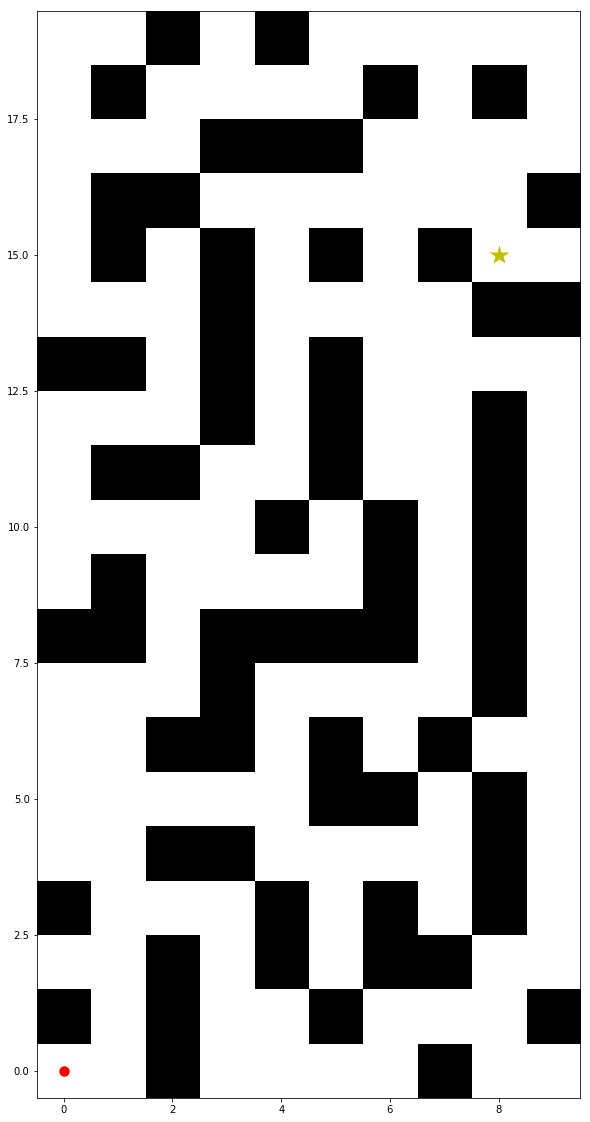

In [2]:
from environment import MazeEnv
mx = 10
my = 20
max_steps = 2*mx*my
env = MazeEnv(mx, my)
env.reset()
env.render()

In [3]:
Q = np.random.rand(mx * my, 4)  # dimensions: states, actions

alpha = 0.2  # learning rate, i.e. which fraction of the Q values should be updated
gamma = 0.9  # discount factor, i.e. to which extent the algorithm considers possible future rewards
epsilon = 0.3  # probability to choose random action instead of best action

def state_index(state):
    return state[0] + mx * state[1]

In [4]:
history = []

In [5]:
verbose = False
heatmap = np.zeros((mx, my))

for epoch in range(1000):    
    state = env.reset()
    done = False
    i = 0
    while not done and env.time < max_steps:
        if verbose: print('State {} (index {}),'.format(state, state_index(state)))
        heatmap[state] += 1
        
        if np.random.rand() <= epsilon:
            action = np.random.randint(4)
            if verbose: print('choosing random action {} ({}),'.format(action, env.action_to_label[action]))
        else:
            action = np.argmax(Q[state_index(state)])
            if verbose: print('choosing best action {} ({}),'.format(action, env.action_to_label[action]))

        new_state, reward, done, info = env.step(action)
        if verbose: print('reward {}'.format(reward))

        Q[state_index(state), action] += alpha * (reward + gamma * np.max(Q[state_index(new_state)]) - Q[state_index(state), action])
        state = new_state
        
    if env.time != max_steps:
        history.append(info['time'])
    else:
        history.append(max_steps+1)
    if verbose: print('Finished in {} steps'.format(info['time']))

(0, 400)

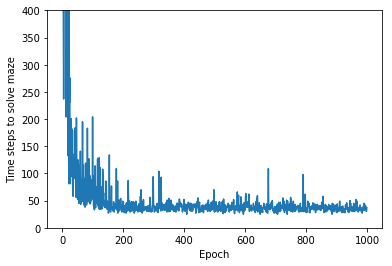

In [6]:
plt.plot(history)
plt.xlabel('Epoch')
plt.ylabel('Time steps to solve maze')
plt.ylim(0, max_steps)

(-0.5, 19.5)

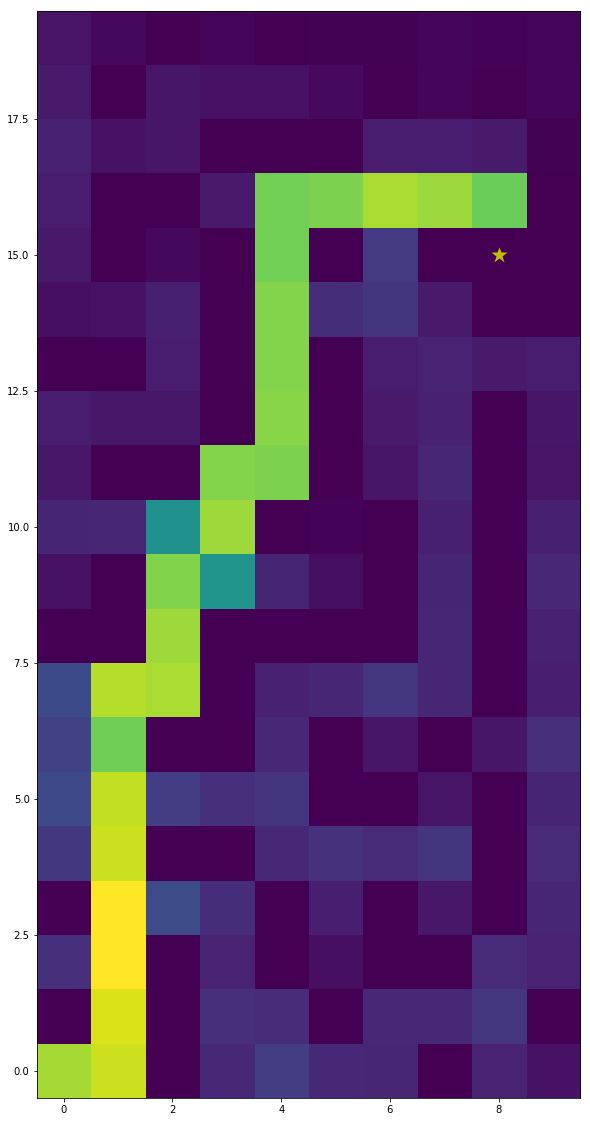

In [7]:
plt.figure(figsize=(mx, my))
plt.imshow(heatmap.T, interpolation='none', origin='lower')
plt.plot(env.treasure[0], env.treasure[1], 'y*', mec='none', markersize=17)  # TODO: Maybe do not get treasure variable directly.
plt.xlim(-0.5, mx - 0.5)
plt.ylim(-0.5, my - 0.5)

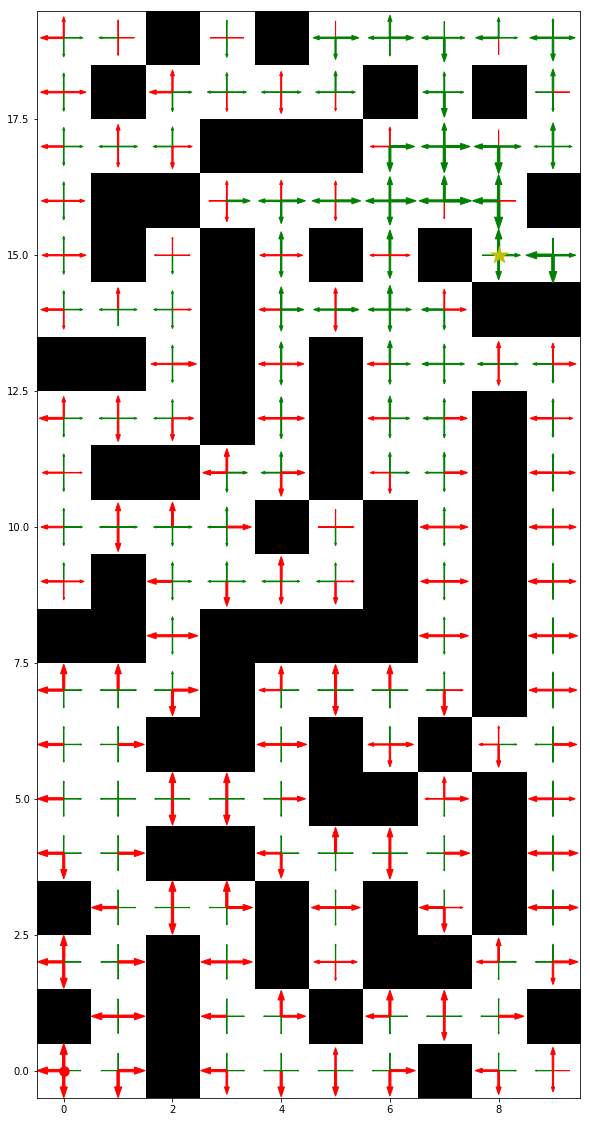

In [8]:
# Plot arrows for each direction, where the arrow width represents the Q value.
env.reset()
env.render()
arrow_length = 0.3
width_factor = 0.05 / np.max(Q)
for x in range(mx):
    for y in range(my):
        for d in range(4):
            if env.maze[x, y] == 0:
                if Q[state_index((x, y)), d] > 0:
                    c = 'g'
                else:
                    c = 'r'
                if d == 0:
                    plt.arrow(x, y, 0., arrow_length, ec=c, fc=c, width=width_factor*np.abs(Q[state_index((x, y)), d])) # up
                elif d == 1:
                    plt.arrow(x, y, 0., -arrow_length, ec=c, fc=c, width=width_factor*np.abs(Q[state_index((x, y)), d])) # down
                elif d == 2:
                    plt.arrow(x, y, -arrow_length, 0., ec=c, fc=c, width=width_factor*np.abs(Q[state_index((x, y)), d])) # left
                elif d == 3:    
                    plt.arrow(x, y, arrow_length, 0., ec=c, fc=c, width=width_factor*np.abs(Q[state_index((x, y)), d])) # right

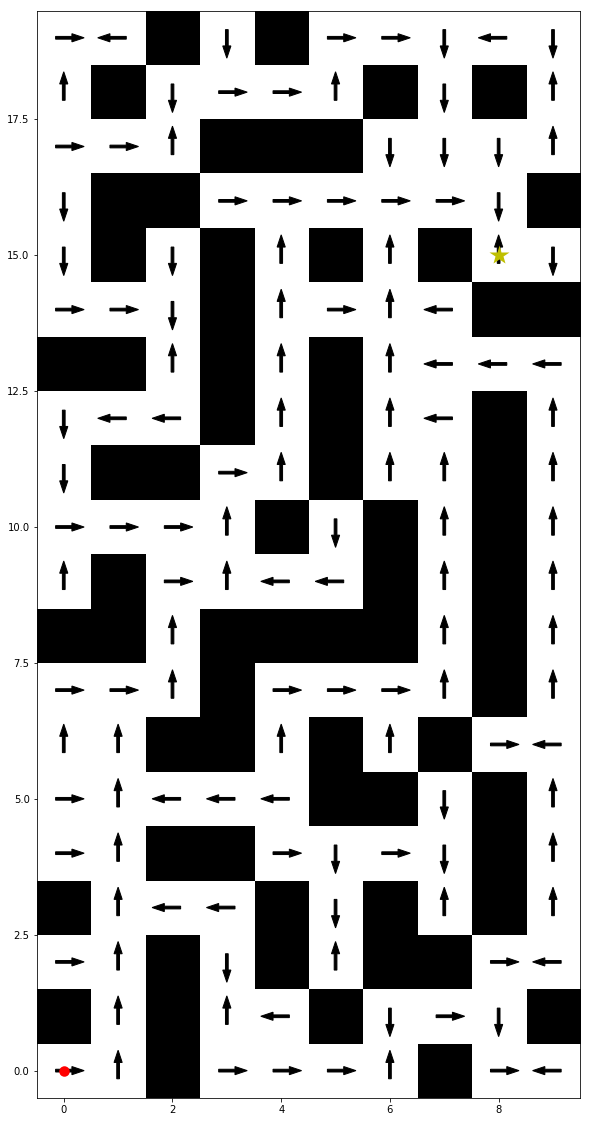

In [9]:
# Plot arrow for the direction with the highest Q value.
env.reset()
env.render()
l = 0.3
c = 'k'
w = 0.05
for x in range(mx):
    for y in range(my):
        best_action = np.argmax(Q[state_index((x, y))])
        if best_action == 0:            
            plt.arrow(x, y-0.5*l, 0, l, ec=c, fc=c, width=w)  # up
        elif best_action == 1:
            plt.arrow(x, y+0.5*l, 0., -l, ec=c, fc=c, width=w)  # down
        elif best_action == 2:
            plt.arrow(x+0.5*l, y, -l, 0., ec=c, fc=c, width=w)  # left
        elif best_action == 3:
            plt.arrow(x-0.5*l, y, l, 0., ec=c, fc=c, width=w)  # right

Finished in 25 steps


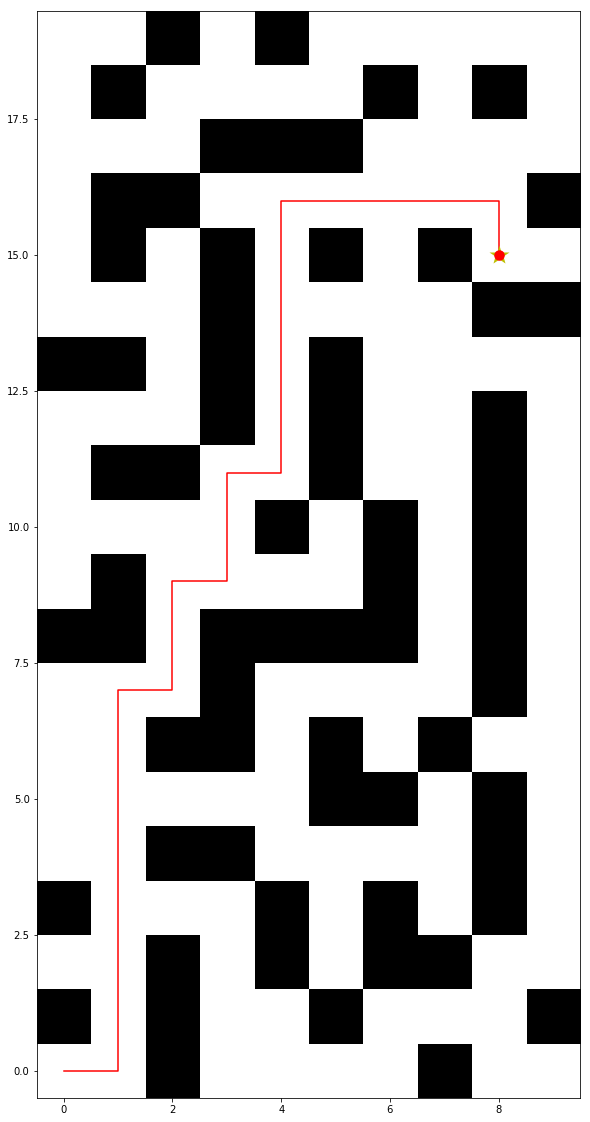

In [10]:
# Single run.
verbose = False

state = env.reset()
done = False

while not done and env.time < max_steps:
    if verbose: print('State {} (index {}),'.format(state, state_index(state)))

    action = np.argmax(Q[state_index(state)])
    if verbose: print('choosing best action {} ({}),'.format(action, env.action_to_label[action]))

    new_state, reward, done, info = env.step(action)
    if verbose: print('reward {}'.format(reward))
    state = new_state
    
print('Finished in {} steps'.format(info['time']))
    
env.render()